In [59]:
#!pip install transformers
#!pip install langdetect

#!pip install EmailParser

import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import re

from langdetect import detect
from langdetect import DetectorFactory




## 

# Exploratory Data Analysis

## 

In [60]:
train = pd.read_csv("./data/train.csv", sep=";")
test = pd.read_csv("./data/test_reduced.csv", sep=";")

In [61]:
train.head()

,Unnamed: 0,Id,Impact,Urgency,IncidentType,ServiceProcessed,MailSubject,MailTextBody,ManualGroups
0,3554,INC000010587669,4-Minor/Localized,2-High,Failure,EDA_S_BA_2FA,smart card blockiert MD5:2225e4a30a5b7e592ba34...,lieber helpdesk sie haben mir den computer fr...,NaN
1,3553,INC000010585556,4-Minor/Localized,4-Low,Service Request,EDA_S_Order Management,FW: Webcam MD5:f757a42a9bdb1dfd9c8427e588586ca8,liebe kolleginnen und kollegen ich möchte für...,NaN
2,3552,INC000010585519,4-Minor/Localized,4-Low,Failure,EDA_S_Peripheriegeräte,FW: IT Support heute Nachmittag MD5:bc594d6bfd...,liebe kolleginnen und kollegen es handelt sic...,NaN
3,3549,INC000010582950,4-Minor/Localized,4-Low,Service Request,EDA_S_Benutzerunterstützung,Botschaft Warschau - Administratoren-Zugang f...,"sehr geehrte damen und herren, die botschaft ...",Benutzeranleitungen_Telefonie
4,3548,INC000010582919,4-Minor/Localized,4-Low,Service Request,EDA_S_Order Management,FW: Commande d'un écran MD5:c2b8cb3281fed4e2d4...,liebe kolleginnen und kollegen ich möchte für...,NaN


In [62]:

def identify_language(document):
    return detect(document.lower())


# Plot label distribution of the data.
def plot_label_distribution(df, label_name, threshold=False):
  """Input: Dataframe, threshold for filtering label frequency.Output: Plotting of label distribution of dataset.""" 
  label_count_dic = df[label_name].value_counts().to_dict()
  label_list = [] # going to be x-axis
  label_freq_list = [] # going to be y-axis
  
  for label, freq in zip(label_count_dic.keys(), label_count_dic.values()):
    # If threshold applies, filter values above threshold.
    if threshold != False: 
      if freq < threshold:
        label_list.append((label))
        label_freq_list.append((freq))
    else:
        label_list.append(label)
        label_freq_list.append((freq))
  # Plotting the distribution.
  plt.figure(figsize=(20,10))
  plt.xticks(rotation="vertical", fontsize=10)
  plt.title("Distribution of All Labels") if threshold == False else plt.title("Label Distribution with Thresholded Labels Frequencies")
  plt.bar(label_list, label_freq_list)
  return plt.show()

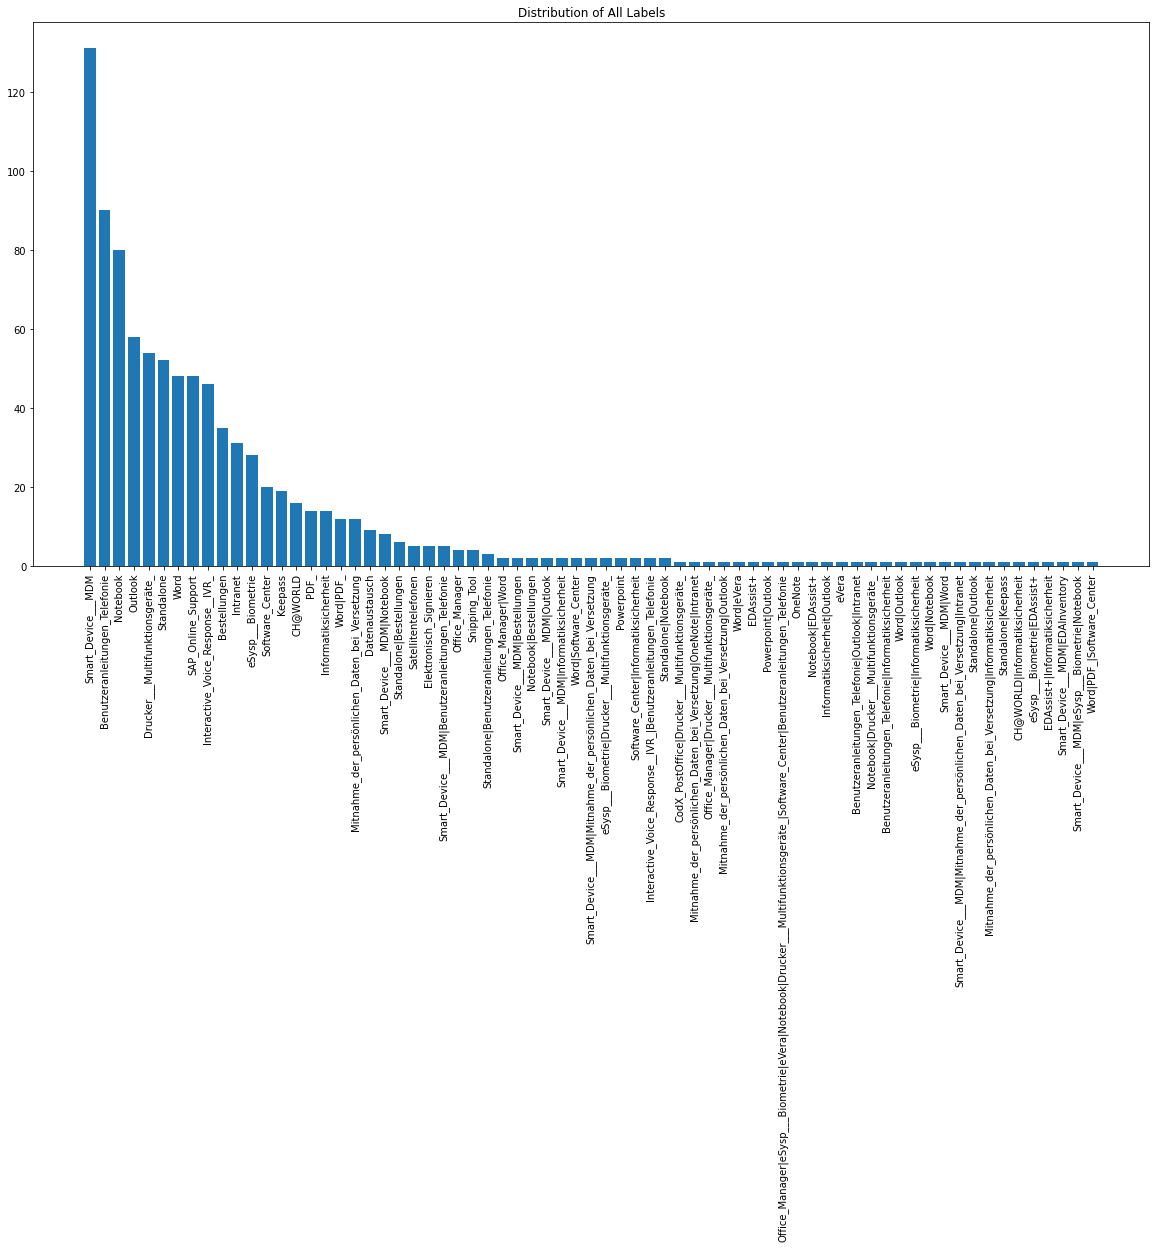

In [63]:
plot_label_distribution(train, "ManualGroups", threshold=False)

([<matplotlib.patches.Wedge at 0x7fc27ec32e48>,
 [Text(0.9894121561467301, 0.48069073765684184, 'Smart_Device___MDM'),
  Text(0.38295458464675247, 1.0311865913102407, 'Benutzeranleitungen_Telefonie'),
  Text(-0.2521718295444239, 1.0707050800216735, 'Notebook'),
  Text(-0.7151145655974364, 0.835829622632741, 'Outlook'),
  Text(-0.9775080270674056, 0.5044581816352953, 'Drucker___Multifunktionsgeräte_'),
  Text(-1.0932944072441895, 0.12127381864432425, 'Standalone'),
  Text(-1.0698281195842532, -0.2558667515462321, 'Word'),
  Text(-0.9283534770284476, -0.5900506941688924, 'SAP_Online_Support'),
  Text(-0.6917603584116231, -0.8552587950616019, 'Interactive_Voice_Response__IVR_'),
  Text(-0.42883292435592324, -1.0129670887982232, 'Bestellungen'),
  Text(-0.18893483310980305, -1.083652909762979, 'Intranet'),
  Text(0.034172400433724444, -1.0994690750760558, 'eSysp___Biometrie'),
  Text(0.2150650368980197, -1.0787710739095915, 'Software_Center'),
  Text(0.35792561522504157, -1.040139055110313

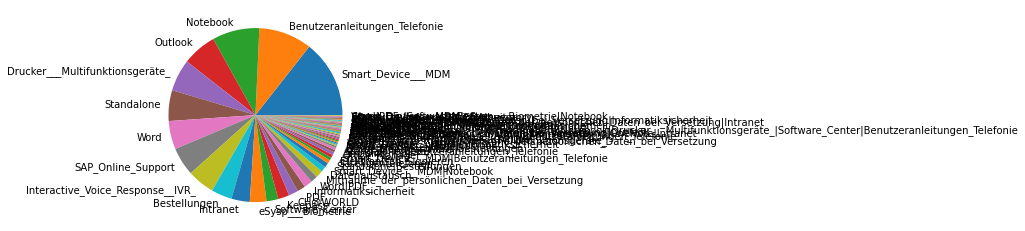

In [64]:
plt.pie(train["ManualGroups"].value_counts(), labels=train["ManualGroups"].value_counts().keys() )

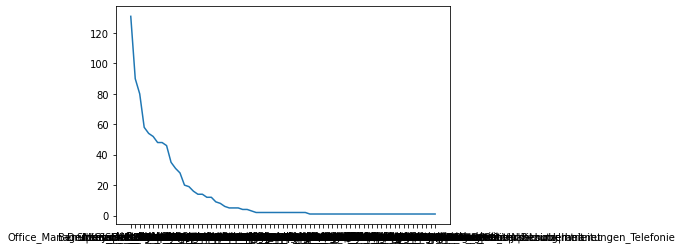

In [65]:
plt.plot(train["ManualGroups"].value_counts())

In [67]:
def identify_language(document):
    return detect(document.lower())

In [68]:
train["WholeMail"] = train["MailSubject"] + " " + train["MailTextBody"]
train.iloc[10]["WholeMail"]

'Smartcard Nr. 0 1 2 3 zu ersetzen MD5:7f83d6c69bb4267e41761837b7dd1ad3 sehr geehrte damen und herren  meine smartcard mit der nr. 0 1 2 3 ist am einen ende gebrochen und muss ersetzt werden. können sie mir eine neue smartcard ausstellen und auf die vertretung in abu dhabi zustellen?  vielen dank und freundliche grüsse'

## 

# Data Cleaning

## 

In [69]:
import re

nlp= spacy.blank("de")

pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

new_text ={"texts":[], "manuals":[]}
s= 0

for index in range(len(train)):

  email = str(train.iloc[index]["WholeMail"])

  phrase = []

  for word in str(email).split():

    if ("MD5" not in word) and ("www" not in word) and ("FW:" not in word) and ("[cid:i" not in word) :
      phrase.append(word.lower())

  email = " ".join(phrase)

  email = re.sub(pattern, "", email)

  tokenized_sentence = " ".join([token.text for token in nlp(email)])


  if len(tokenized_sentence)>10000:
    print(len(tokenized_sentence))

    continue

  if identify_language(tokenized_sentence ) == "de":

    new_text["texts"].append(tokenized_sentence )

    if str(train.iloc[index]["ManualGroups"]) == "nan":
      new_text["manuals"].append("None")

    else:
  
      new_text["manuals"].append(str(train.iloc[index]["ManualGroups"]))

print(len(new_text["texts"]), len(new_text["manuals"]))

30950
14837
24081
25681
23993
10485
12908
2661 2661


Install tensorflow if necesary

In [71]:
#!pip install tensorflow==2.1.0
#!pip install tensorflow-text==2.1.0rc0
#!pip install tensorflow_hub==0.8.0


None
smartcard defekt sehr geehrte damen und herren meine smartcard ist gebrochen . sie funktioniert noch im computer , aber nicht mehr für den zutritt ins gebäude freiburgstrasse 0 1 2 3 . können sie mir bitte einen termin für die erneuerung geben ? danke ! mit freundlichen grüsse


In [72]:
import tensorflow as tf

import tensorflow_hub as hub

import tensorflow_text

In [73]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)])

multi_use_lg = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

embeddings = multi_use_lg(["The quick brown fox jumps over the lazy dog.", "I am a sentence for which I would like to get its embedding"])


In [74]:
print(embeddings)

tf.Tensor(
[[-0.00258476 -0.00059474  0.07525814 ...  0.0069227  -0.04728684
   0.0414308 ]
 [ 0.01956905  0.02436489 -0.08010634 ...  0.00997892 -0.05102586
  -0.00850214]], shape=(2, 512), dtype=float32)


Encode al the emails with use

In [75]:

embeddings= []

s = 0

for i in range(len(new_text["texts"])):

    if i % 10 == 0 and i > 0:

        try:

            tmp_embeddings = np.array(multi_use_lg(new_text["texts"][s:i]))

        except:
            print(new_text["texts"][s:i])
 
        for j in range(0, len(tmp_embeddings)):
            embeddings.append(tmp_embeddings[j])

        s = i

    li = i

if s != li:

    tmp_embeddings = np.array(multi_use_lg(new_text["texts"][s:li + 1]))

    for j in range(0, len(tmp_embeddings)):
        embeddings.append(tmp_embeddings[j])

embedded_emails = np.array(embeddings)
print(len(embedded_emails))

2660


Normalize vectors 

In [76]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

embedded_emails_normalized = StandardScaler().fit_transform(embedded_emails)

print(len(embedded_emails_normalized))

#svd_X = TruncatedSVD(n_components=256, n_iter=7, random_state=0).fit_transform(svd_X)

#svd_X = StandardScaler().fit_transform(svd_X)



2660


Cluster vectors

In [101]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=5, n_jobs = 4, metric='cosine').fit(embedded_emails)

Isolate similarity clusters with 90%>elements with no-manuals

In [102]:
clustered_services = {}

clusters_ids = {}

amount_labels= {}

for i in range(len(new_text["manuals"])):

    if str(new_text["manuals"][i]) not in amount_labels:

        amount_labels[str(new_text["manuals"][i])] = 1

    else:
        amount_labels[str(new_text["manuals"][i])]+= 1


for i in range(len(clustering.labels_)):

    if str(clustering.labels_[i]) not in clustered_services:

        clustered_services[str(clustering.labels_[i])] = {}

        clusters_ids[str(clustering.labels_[i])] = []



for i in range(len(clustering.labels_)):

    clusters_ids[str(clustering.labels_[i])].append(str(i))

    if new_text["manuals"][i] not in clustered_services[str(clustering.labels_[i])]:

        clustered_services[str(clustering.labels_[i])][new_text["manuals"][i]] = 1
    else:
        clustered_services[str(clustering.labels_[i])][new_text["manuals"][i]] +=1


unknown_clusters = {}
s= 0

for elem in clustered_services:

    if "None" not in clustered_services[elem]:
        continue

    total_elem = clustered_services[elem]["None"]

    for elem1 in  clustered_services[elem]:
        if elem1 != "None":
            total_elem+=clustered_services[elem][elem1]

    if (  clustered_services[elem]["None"] / total_elem) >0.9:

        unknown_clusters[str(s)] = clusters_ids[elem] 

        print(s, clustered_services[elem], unknown_clusters[str(s)])
        print()

        s+=1


0 {'None': 9} ['75', '1581', '1771', '2143', '2160', '2422', '2475', '2531', '2639']

1 {'None': 12} ['205', '255', '437', '489', '914', '1025', '1029', '1124', '1131', '1158', '1238', '1312']

2 {'None': 39, 'CH@WORLD': 1} ['408', '547', '581', '619', '651', '705', '822', '860', '1087', '1110', '1290', '1306', '1367', '1374', '1383', '1538', '1565', '1582', '1589', '1590', '1641', '1683', '1751', '1869', '1883', '1899', '1923', '1944', '2037', '2040', '2051', '2060', '2075', '2101', '2102', '2104', '2114', '2117', '2238', '2362']

3 {'None': 5} ['886', '1123', '1134', '1171', '1388']

4 {'None': 5} ['2142', '2161', '2175', '2207', '2284']



Explore different possible Topics eg. (Topic 1 could be Mouse broken, Topic 2 Router problem, Topic 3 Login issues)

In [103]:
for elem in unknown_clusters:
    print("Topic:", int(elem)+1)
    for elem1 in unknown_clusters[elem]:
        print()
        print(new_text["texts"][int(elem1)])

    print()
    print()

Topic: 1

maus funktioniert nicht richtig liebes helpdesk-team ich habe ein problem mit der maus . d.h. der doppelklick funktioniert nicht mehr . ich habe mehrmals den compi runter gefahren und wieder rauf , ohne erfolg . danach habe ich mir eine andere maus ausgeliehen von einer kollegin und damit funktioniert es . daraufhin wollte ich ein e-order machen - jedoch war mir nicht klar wo , wie , was , da ich das tool selten benutze . da ich ab morgen 2 wochen in den ferien bin wäre ich froh , wenn sie mir in der zwischenzeit eine neue maus zukommen lassen könnten . mit bestem dank und freundlichen grüsse

mouse sehr geehrte damen und herren mein mouse funktioniert nicht mehr . wie soll ich vorgehen um ein neues zu bestellen ? ich bedanke mich im voraus für ihre antwort und wünsche ihnen noch einen schönen tag . freundliche grüsse

mouse defekt sehr geehrte damen und herren seit letzter woche habe ich probleme mit der mouse , die teilweise doppelklickt , von alleine klickt oder der klick 